<a href="https://colab.research.google.com/github/Phuc-Homoji/BaiTapAI/blob/main/11loaitienVN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# liên kết Google drive với colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from keras.preprocessing.image import load_img, img_to_array,array_to_img,ImageDataGenerator, image
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.models import load_model
from keras.models import  Sequential
import os

In [6]:
train_data = '/content/drive/MyDrive/AI/CNN_11LoaiTienVN/Train'
val_data  =  '/content/drive/MyDrive/AI/CNN_11LoaiTienVN/Validation'
test_data =  '/content/drive/MyDrive/AI/CNN_11LoaiTienVN/Test'

In [7]:
from keras.engine.data_adapter import train_validation_split
#preprocessing
data_scale = ImageDataGenerator(
              rescale=1. / 255,
              shear_range=0.2,
              zoom_range=0.2,
              horizontal_flip=True)

train_input = data_scale.flow_from_directory(train_data,
                        target_size=(100, 100),
                        batch_size=20,
                        class_mode="categorical")

val_input = data_scale.flow_from_directory(val_data,
                        target_size=(100, 100),
                        batch_size=20,
                        class_mode="categorical")

test_input = data_scale.flow_from_directory(test_data,
                        target_size=(100, 100),
                        batch_size=20,
                        class_mode="categorical")

Found 306 images belonging to 11 classes.
Found 62 images belonging to 11 classes.
Found 15 images belonging to 11 classes.


In [8]:
#setting lable
class_money = ['100k', '10k', '1k', '200', '200k', '20k', '2k', '500', '500k','50k','5k']

print("labels: ", class_money)
print("match class: ", train_input.class_indices)
print("Tổng cộng: ",train_input.num_classes)

labels:  ['100k', '10k', '1k', '200', '200k', '20k', '2k', '500', '500k', '50k', '5k']
match class:  {'100k': 0, '10k': 1, '1k': 2, '200': 3, '200k': 4, '20k': 5, '2k': 6, '500': 7, '500k': 8, '50k': 9, '5k': 10}
Tổng cộng:  11


In [9]:
#MODEL CNN
model=Sequential()

#LAYER 1
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 2
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
#LAYER 3
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))


#FULLY CONNECTED LAYER
#Flatten Layer is used to change the dimension of output from convolution layer, which has 3D, to 2D output
model.add(Flatten())

#Dense(512) is a fully-connected layer with 128 hidden units
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(11,activation='softmax'))  #10 class_name
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 50, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 25, 25, 64)        0

In [10]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
money_train = model.fit(train_input,batch_size=5,epochs=100,verbose=1,validation_data=val_input)

Epoch 1/100
16/16 [==============================] - 16s 986ms/step - loss: 1.0856 - accuracy: 0.6765 - val_loss: 1.7543 - val_accuracy: 0.3710
Epoch 2/100
16/16 [==============================] - 16s 991ms/step - loss: 0.8833 - accuracy: 0.7255 - val_loss: 1.5218 - val_accuracy: 0.4516
Epoch 3/100
16/16 [==============================] - 16s 971ms/step - loss: 0.9183 - accuracy: 0.6993 - val_loss: 1.7100 - val_accuracy: 0.4839
Epoch 4/100
16/16 [==============================] - 16s 969ms/step - loss: 0.8492 - accuracy: 0.7124 - val_loss: 1.4690 - val_accuracy: 0.4839
Epoch 5/100
16/16 [==============================] - 16s 962ms/step - loss: 0.8553 - accuracy: 0.7092 - val_loss: 1.6554 - val_accuracy: 0.4194
Epoch 6/100
16/16 [==============================] - 16s 958ms/step - loss: 0.9672 - accuracy: 0.6765 - val_loss: 1.6214 - val_accuracy: 0.4839
Epoch 7/100
16/16 [==============================] - 16s 974ms/step - loss: 0.8726 - accuracy: 0.7255 - val_loss: 1.9387 - val_accuracy:

In [18]:
model.save('/content/drive/MyDrive/AI/CNN_11LoaiTienVN/money.h5')

Giá trị : 10k


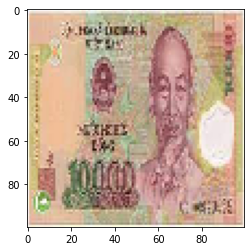

In [20]:
pic = image.load_img('/content/drive/MyDrive/AI/CNN_11LoaiTienVN/Test/10k/10000dong.2.jpg', target_size=(100,100)) 
plt.imshow(pic)
pic = img_to_array(pic)
pic = pic.reshape(1,100,100,3) 
pic = pic.astype('float32')
pic = pic/255
np.argmax(model.predict(pic), axis=1)

# predict 
guess=np.argmax(model.predict(pic), axis=1)
#đặt điều kiện
if guess[0]==0:
  print("Giá trị : 100k")
if guess[0]==1:
  print("Giá trị : 10k")
if guess[0]==2:
  print("Giá trị : 1k")
if guess[0]==3:
  print("Giá trị : 200")
if guess[0]==4:
  print("Giá trị : 200k")
if guess[0]==5:
  print("Giá trị : 20k")
if guess[0]==6:
  print("Giá trị : 2k")
if guess[0]==7:
  print("Giá trị : 500")
if guess[0]==8:
  print("Giá trị : 500k")
if guess[0]==9:
  print("Giá trị : 50k")
if guess[0]==10:
  print("Giá trị : 5k")